## MNIST DB Classifier

###18.11.23



In [2]:
print('Hello World') #문자 출력

Hello World


In [4]:
!git clone https://github.com/Jpub/TensorflowDeeplearning jupyter_tfbook
    #github로부터 파일을 clone해온다. 
    #이후 파일목록을 확인하면 새로운 폴더가 추가되어 있는것을 확인할 수 있다.

fatal: destination path 'jupyter_tfbook' already exists and is not an empty directory.


### SoftMax

In [5]:
# CNN 출력 이전layer에 항상 softmax 가 붙는다
# 총합이 1, 각 class에 해당하는 확률을 배당하는 함수이다.

### MNIST Dataset 받아오기

In [1]:
import numpy as np #numpy library import
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
images, labels = mnist.train.next_batch(10)

In [8]:
#추출한 데이터는 이미지 데이터와 라벨 데이터로 나뉘며 
#여기선 각각을 변수 images와 label로 저장한다.

#각각 10개의 데이터를 포함하는 리스트로 되어잇다.
#추출한 이미지는 28x28 = 784 픽셀에 대해 
#각각의 농도를 나타내는 수치를 ㄴ열한 list이다. 

In [11]:
print (images[0]) #255 크기의 데이터값을 생으로 출력한다.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 진짜 이미지 출력


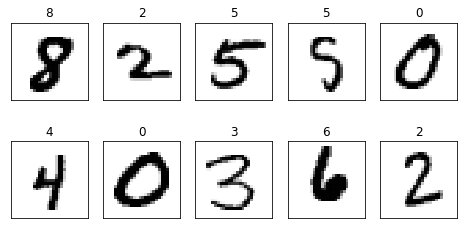

In [14]:
fig = plt.figure(figsize = [8,4]) # 코드 나누면 이미지 안뜸 
for c, (image, label) in enumerate(zip(images,labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' %np.argmax(label))  #오브젝트 subplot의 imshow메소드로 이미지를 출력한다. 
    subplot.imshow(image.reshape((28,28)),vmin=0,vmax=1,cmap=plt.cm.gray_r, interpolation="nearest") # 28크기의 이미지로 출력. 
    #vmin vmax는 농담의 범위이다. # 원래 픽셀간 보정을 통해 이미지를 부드럽게 출력하는데 여기서는 nearest 설정을 통해 비활성화 했다.

### MNIST 구현


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20181123)
tf.set_random_seed(20181123)

In [16]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [31]:
num_filters1 = 32 
#1st convolution filter

x = tf.placeholder(tf.float32, [None,784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1], stddev=0.1))
h_conv1 = tf.nn.conv2d(x_image,W_conv1,strides=[1,1,1,1],padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1]))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')


In [33]:
num_filters2 = 64 
# 2nd convolution filter

W_conv2 = tf.Variable(tf.truncated_normal([5,5,num_filters1,num_filters2], stddev=0.1))

h_conv2 = tf.nn.conv2d(h_pool1, W_conv2, strides=[1,1,1,1],padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1,shape=[num_filters2])) # Variable =/= Varialbe
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


In [47]:
h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*num_filters2])
#전 결합층, dropout(overfit방지), softmax함수 추가한다.
#softmax = 총합이 1인 classifier

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float32)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2,10]))
b0 = tf.Variable(tf.zeros([10]))
p=tf.nn.softmax(tf.matmul(hidden2_drop,w0)+b0)

In [52]:
t = tf.placeholder(tf.float32, [None,10])
loss = -tf.reduce_sum(t*tf.log(p)) #loss func
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss) #트레이닝  크기
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #정답률

In [61]:
#session준비
sess = tf.InteractiveSession()

#sess = tf.InteractiveSession.close()

sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [71]:
#1회당 50개의 데이터를 사용하는 미니 배치로 파라미터 최적화 실시한다.
i=0
for _ in range(200):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step, feed_dict = {x:batch_xs, t:batch_ts, keep_prob:0.5})
    
    if i%50 ==0:
        loss_vals, acc_vals = [],[]
        for c in range(4):
            start = len(mnist.test.labels) /4*c
            end = len(mnist.test.labels) / 4*(c+1)
            loss_val, acc_val = sess.run([loss,accuracy],
                                        feed_dict={x:mnist.test.images[start:end],
                                                   t:mnist.test.labels[start:end],
                                                   keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print('Step: %d, Loss: %f, Accuracy:%f'
              %(i,loss_val, acc_val))
        saver.save(sess, 'enn_session', global_step=i)

TypeError: slice indices must be integers or None or have an __index__ method